<a href="https://colab.research.google.com/github/danilovabg/SkillFactory/blob/master/Project_4_ML_Danilova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [ ]:
%pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [ ]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [ ]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

пропуски существуют в колонке balance

### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].apply(lambda x: float(''.join(x.split()[:-1]).replace(',', '.')) if x.__class__.__name__ == 'str' else float(x))
round(df['balance'].mean(), 3)

1529.129

### Задание 4

In [ ]:
df['balance'] = df['balance'].fillna(df['balance'].median())
round(df['balance'].mean(), 3)

1526.936

### Задание 5

In [ ]:
for i in df[df['job'] == 'unknown'].index:
    df.loc[i,'job'] = df['job'].mode().values[0]

In [ ]:
for i in df[df['education'] == 'unknown'].index:
    df.loc[i,'education'] = df['education'].mode().values[0]

In [ ]:
round(df[(df['job'] == df['job'].mode().values[0]) & (df['education'] == df['education'].mode().values[0])]['balance'].mean(), 3)

1598.883

### Задание 6

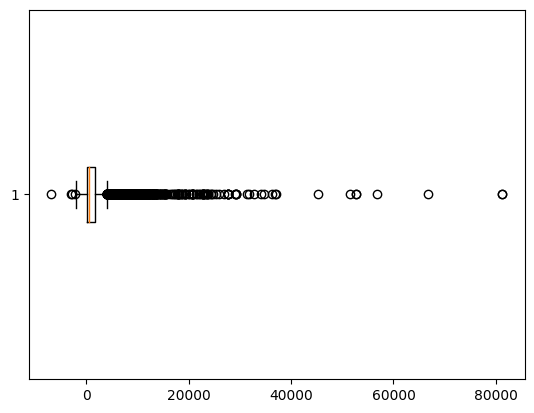

In [ ]:
# удалите все выбросы для признака balance
plt.boxplot(df['balance'], vert = False);

In [ ]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
# Вычисляем межквартильный размах
IQR = Q3 - Q1

# Коэффициент для определения границ (обычно 1.5)
k = 1.5

# Определяем границы выбросов
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR
print(lower_bound, upper_bound)

-2241.0 4063.0


In [ ]:
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
df.shape

(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
len(df[df['deposit'] == 'yes'])

4681

### Задания 2 и 3

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задания 4 и 5

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
cat_cols = [el for el in df.columns if str(df[el].dtypes) == 'object']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

### Задание 6

In [ ]:
df['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

### Задание 7

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
d = df.groupby(['month', 'deposit']).agg(['count'])['job'].reset_index()
d_s = d.groupby(['month']).agg(['sum'])
d_n = d[d['deposit'] == 'no']
conc = d_n.merge(d_s, on = 'month')
conc['conv'] = conc['count']/conc[('count', 'sum')]
conc[['month', 'conv']].sort_values(by = 'conv', ascending = False)

,month,conv
8,may,0.678640
4,jan,0.608150
5,jul,0.589563
9,nov,0.584615
1,aug,0.559567
6,jun,0.548913
3,feb,0.455571
0,apr,0.381928
10,oct,0.185075
11,sep,0.165468


### Задание 8

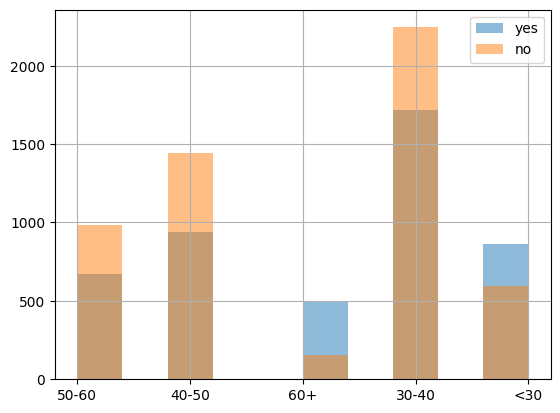

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_bins(x):
  if x < 30:
    return '<30'
  if x < 40:
    return '30-40'
  if x < 50:
    return '40-50'
  if x < 60:
    return '50-60'
  return '60+'

df['age_bin'] = df['age'].apply(lambda x: age_bins(x))
df[df['deposit'] == 'yes']['age_bin'].hist(alpha = 0.5, )
df[df['deposit'] == 'no']['age_bin'].hist(alpha = 0.5)
plt.legend(['yes', 'no']);

In [ ]:
c_tab = pd.crosstab(df['age_bin'], df['deposit'], normalize='index')
c_tab

deposit,no,yes
age_bin,,
30-40,0.566776,0.433224
40-50,0.606213,0.393787
50-60,0.594921,0.405079
60+,0.240429,0.759571
<30,0.408247,0.591753


### Задания 9 и 10

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_bin'],
      dtype='object')

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
c_tab = pd.crosstab(df['marital'], df['deposit'], normalize='index')
c_tab

deposit,no,yes
marital,,
divorced,0.530161,0.469839
married,0.577953,0.422047
single,0.465920,0.534080


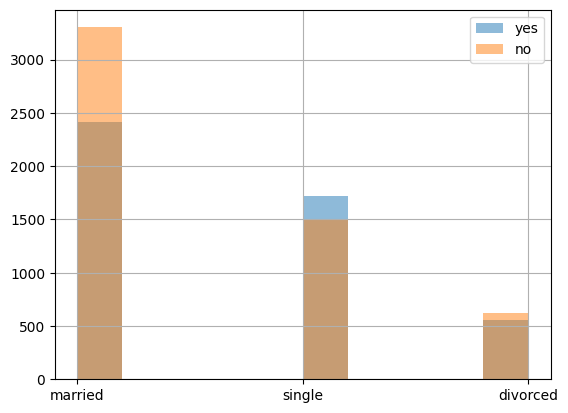

In [ ]:
df[df['deposit'] == 'yes']['marital'].hist(alpha = 0.5, )
df[df['deposit'] == 'no']['marital'].hist(alpha = 0.5)
plt.legend(['yes', 'no']);

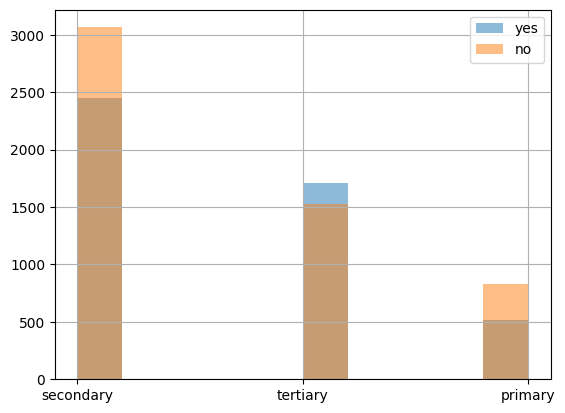

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
df[df['deposit'] == 'yes']['education'].hist(alpha = 0.5, )
df[df['deposit'] == 'no']['education'].hist(alpha = 0.5)
plt.legend(['yes', 'no']);

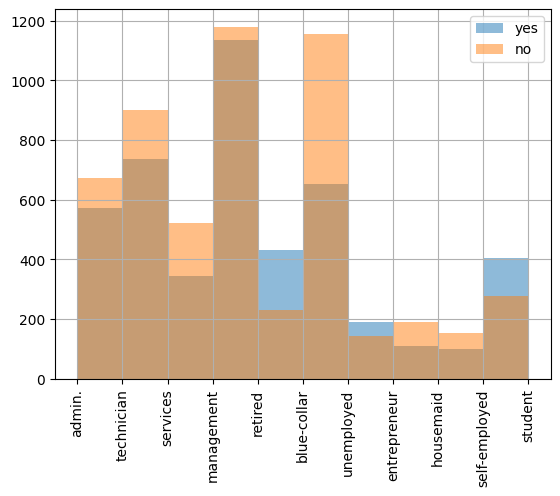

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
df[df['deposit'] == 'yes']['job'].hist(alpha = 0.5, )
df[df['deposit'] == 'no']['job'].hist(alpha = 0.5)
plt.legend(['yes', 'no'])
plt.xticks(rotation = 90);

### Задание 11

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
dep_yes = df[df['deposit'] == 'yes']
cross_tab_yes = pd.crosstab(dep_yes['education'], dep_yes['marital'], normalize='index')
cross_tab_yes

marital,divorced,married,single
education,,,
primary,0.185687,0.655706,0.158607
secondary,0.115463,0.525908,0.358629
tertiary,0.101576,0.457677,0.440747


In [ ]:
dep_no = df[df['deposit'] == 'no']
cross_tab_no = pd.crosstab(dep_no['education'], dep_no['marital'], normalize='index')
cross_tab_no

marital,divorced,married,single
education,,,
primary,0.109375,0.770433,0.120192
secondary,0.120678,0.596869,0.282453
tertiary,0.106815,0.545216,0.347969


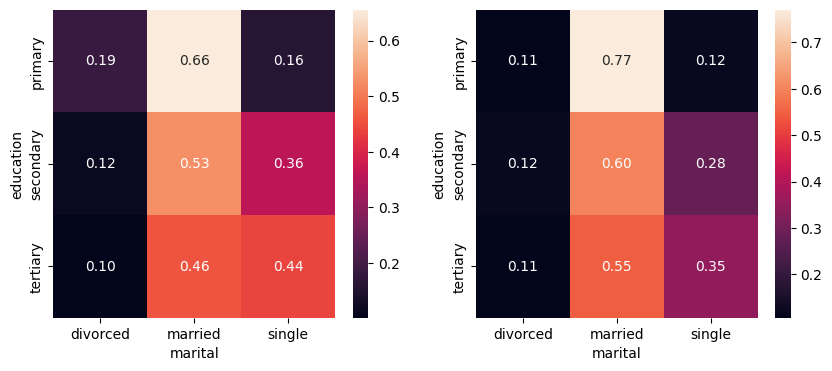

In [ ]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
sns.heatmap(cross_tab_yes, fmt='.2f',annot=True)
plt.subplot(122)
sns.heatmap(cross_tab_no, fmt='.2f',annot=True);

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования
le = LabelEncoder()
df['education_le'] = le.fit_transform(df['education'])
df['age_bin'] = le.fit_transform(df['age_bin'])

In [ ]:
df['education_le'].sum()

11995

### Задания 2 и 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           10105 non-null  int64  
 1   job           10105 non-null  object 
 2   marital       10105 non-null  object 
 3   education     10105 non-null  object 
 4   default       10105 non-null  object 
 5   balance       10105 non-null  float64
 6   housing       10105 non-null  int64  
 7   loan          10105 non-null  int64  
 8   contact       10105 non-null  object 
 9   day           10105 non-null  int64  
 10  month         10105 non-null  object 
 11  duration      10105 non-null  int64  
 12  campaign      10105 non-null  int64  
 13  pdays         10105 non-null  int64  
 14  previous      10105 non-null  int64  
 15  poutcome      10105 non-null  object 
 16  deposit       10105 non-null  object 
 17  age_bin       10105 non-null  int64  
 18  education_le  10105 non-nu

In [ ]:
binary_cols = ['housing', 'loan', 'default', 'deposit']
for col in binary_cols:
    df[col] = df[col].replace({'yes': 1, 'no': 0})

In [ ]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,age_bin,education_le
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,0.016428,807.653538,0.481148,0.137853,15.590302,368.742603,2.517170,51.319644,0.816230,0.463236,1.332905,1.187036
std,11.734931,0.127119,994.151966,0.499669,0.344762,8.441510,346.651524,2.707159,109.644179,2.243795,0.498671,1.414007,0.647373
min,18.000000,0.000000,-2049.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,95.000000,0.000000,0.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,0.000000,445.000000,0.000000,0.000000,15.000000,252.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
75%,48.000000,0.000000,1227.000000,1.000000,0.000000,22.000000,490.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000
max,95.000000,1.000000,4063.000000,1.000000,1.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000,4.000000,2.000000


In [ ]:
0.481148	+  0.137853 + 0.016428

0.635429

### Задание 4

In [ ]:
# создайте дамми-переменные
dum_cols = ['job', 'marital', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=dum_cols, prefix=dum_cols)
df_encoded


,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,secondary,0,2343.0,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,secondary,0,45.0,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,secondary,0,1270.0,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,secondary,0,2476.0,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,tertiary,0,184.0,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,primary,0,1.0,1,0,20,257,1,-1,...,0,0,0,0,0,0,0,0,0,1
11158,39,secondary,0,733.0,0,0,16,83,4,-1,...,1,0,0,0,0,0,0,0,0,1
11159,32,secondary,0,29.0,0,0,19,156,2,-1,...,0,0,0,0,0,0,0,0,0,1
11160,43,secondary,0,0.0,0,1,8,9,2,172,...,0,0,1,0,0,0,1,0,0,0


### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

<Axes: >

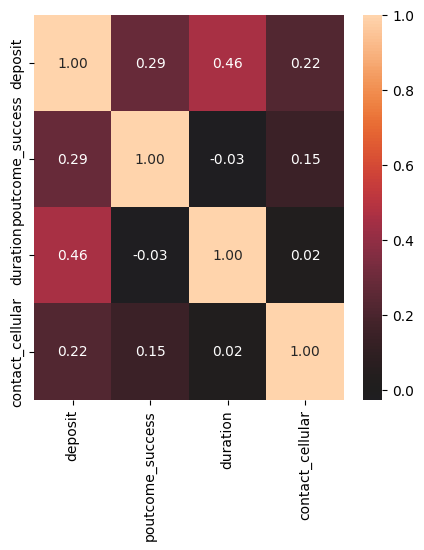

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df_encoded[['deposit', 'poutcome_success', 'duration', 'contact_cellular']].corr(),fmt='.2f',annot=True, center=0)

<Axes: >

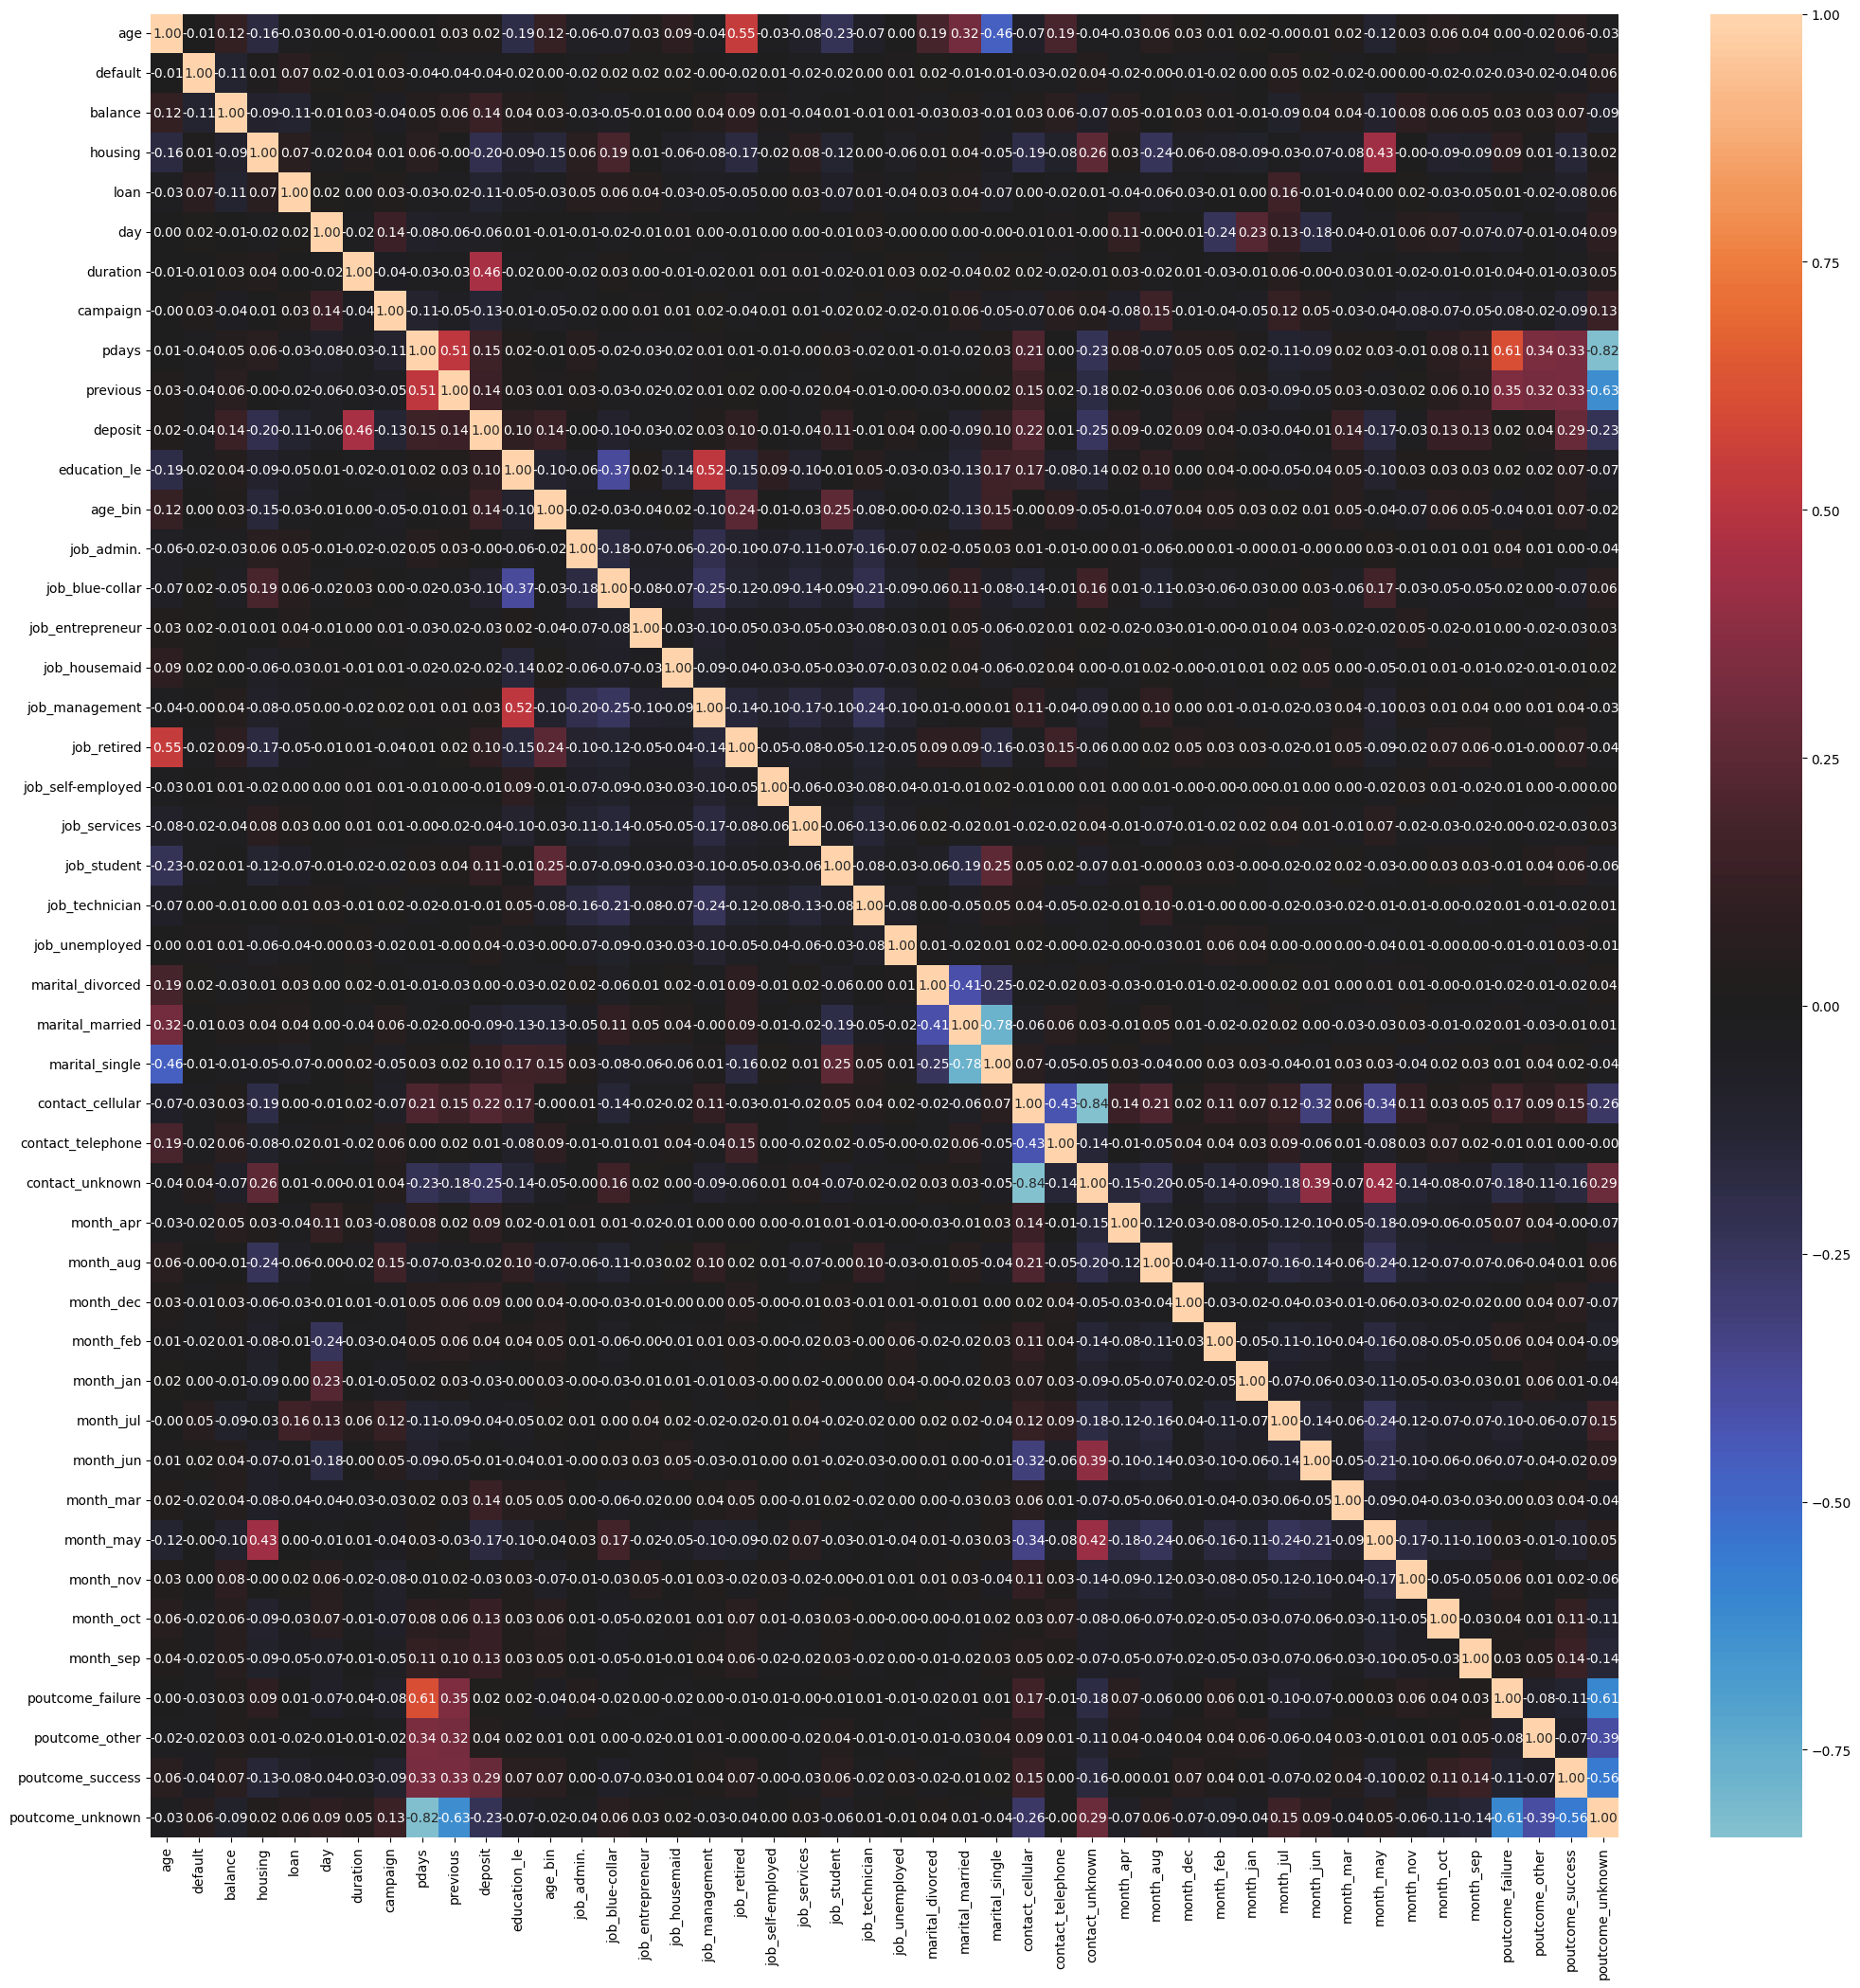

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df_encoded.corr(),fmt='.2f',annot=True, center=0)

### Задания 7 и 8

In [ ]:
X = df_encoded.drop(['deposit'], axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
y_test.mean()

0.46326836581709147

In [ ]:
# рассчитайте необходимые показатели

### Задание 9

In [ ]:
cols = [el for el in X_train.columns if 'int' in str(X_train[el].dtype) or 'float' in str(X_train[el].dtype)]

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

selector = SelectKBest(score_func = f_classif, k=15)
selector.fit(X_train[cols], y_train)


selected_columns = selector.get_feature_names_out()

### Задание 10

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# нормализуйте данные с помощью minmaxsxaler
scaler = MinMaxScaler()
scaler.fit(X_train[selected_columns])
X_train_scaled = pd.DataFrame(scaler.transform(X_train[selected_columns]),columns= selected_columns )
X_test_scaled = pd.DataFrame(scaler.transform(X_test[selected_columns]),columns= selected_columns )


In [ ]:
X_test_scaled.describe()

,balance,housing,duration,campaign,pdays,previous,age_bin,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
count,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000
mean,0.468237,0.484858,0.093294,0.036153,0.062139,0.014501,0.336357,0.718741,0.209295,0.023688,0.251574,0.031484,0.029385,0.097451,0.743928
std,0.162158,0.499846,0.087248,0.063826,0.129784,0.039494,0.352174,0.449681,0.406867,0.152099,0.433983,0.174649,0.168909,0.296616,0.436527
min,0.017179,0.000000,0.000258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352094,0.000000,0.034029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.408704,0.000000,0.063676,0.023810,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.535504,1.000000,0.127224,0.047619,0.033333,0.017241,0.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.999836,1.000000,0.797113,0.952381,0.969591,0.948276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [55]:
# обучите логистическую регрессию и рассчитайте метрики качества
lg_model = LogisticRegression(solver = 'sag', max_iter = 1000, random_state = 42)
lg_model.fit(X_train_scaled, y_train)
pred_tr = lg_model.predict(X_train_scaled)
pred_te = lg_model.predict(X_test_scaled)
print(classification_report(y_test, pred_te))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.73      0.78      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335



In [ ]:
accuracy_score(y_test, pred_te)

0.8047976011994002

### Задания 2,3,4

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# обучите решающие деревья, настройте максимальную глубину
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_model.fit(X_train_scaled, y_train)
pred_tr = dt_model.predict(X_train_scaled)
pred_te = dt_model.predict(X_test_scaled)
print(classification_report(y_test, pred_te))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1790
           1       0.74      0.71      0.72      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.74      0.75      3335
weighted avg       0.75      0.75      0.75      3335



In [ ]:
accuracy_score(y_train, pred_tr)

1.0

### Задание 5

In [ ]:
from tqdm import tqdm

In [51]:
acc_tr, acc_te = [], []
for i in tqdm(range(1, 100)):
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = i)
    dt_model.fit(X_train_scaled, y_train)
    pred_tr = dt_model.predict(X_train_scaled)
    pred_te = dt_model.predict(X_test_scaled)
    acc_tr.append(accuracy_score(y_train, pred_tr))
    acc_te.append(accuracy_score(y_test, pred_te))


100%|██████████| 99/99 [00:05<00:00, 17.83it/s]


In [ ]:
max(acc_te)

0.8185907046476761

(0.6, 1.0)

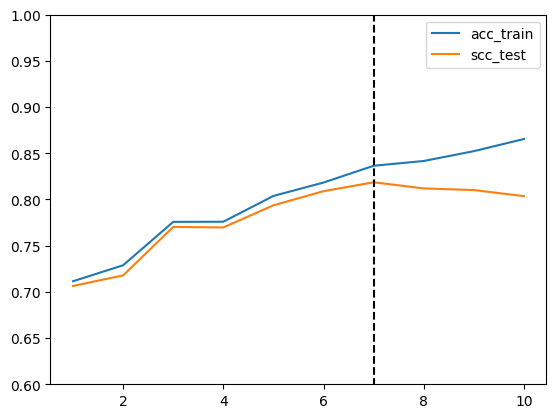

In [ ]:
plt.plot(range(1, 100)[:10], acc_tr[:10])
plt.plot(range(1, 100)[:10], acc_te[:10])
plt.legend(['acc_train', 'scc_test'])
plt.vlines(7, ymin = 0, ymax = 1, color = 'black', linestyle = '--')
plt.ylim(0.6, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [53]:
# подберите оптимальные параметры с помощью gridsearch
param_grid = {'min_samples_split': [2, 5, 7, 10],
              'max_depth':[3,5,7]
              }
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(
        random_state=42, #генератор случайных чисел
        criterion = 'entropy'
        # max_iter=1000 #количество итераций на сходимость
    ),
    param_grid=param_grid,
    cv=5,
    n_jobs = -1
)
%time grid_search.fit(X_train_scaled, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
y_test_pred = grid_search.predict(X_test_scaled)
y_tr_pred = grid_search.predict(X_train_scaled)
print('accuracy на тестовом наборе: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
print('accuracy на тренировочном  наборе: {:.2f}'.format(accuracy_score(y_train, y_tr_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: user 251 ms, sys: 88.5 ms, total: 340 ms
Wall time: 5.15 s
accuracy на тестовом наборе: 0.82
accuracy на тестовом наборе: 0.82
accuracy на тренировочном  наборе: 0.84
f1_score на тестовом наборе: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 10}


In [54]:
dt_cl = DecisionTreeClassifier(
        random_state=42, #генератор случайных чисел
        criterion = 'entropy',
        min_samples_split = 10,
        max_depth = 6)

dt_cl.fit(X_train_scaled, y_train)
y_test_pred = grid_search.predict(X_test_scaled)
y_tr_pred = grid_search.predict(X_train_scaled)
print('accuracy на тестовом наборе: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
print('accuracy на тренировочном  наборе: {:.2f}'.format(accuracy_score(y_train, y_tr_pred)))
print('f1_score на тестовом наборе: {:.3f}'.format(f1_score(y_test, y_test_pred)))


accuracy на тестовом наборе: 0.82
accuracy на тренировочном  наборе: 0.84
f1_score на тестовом наборе: 0.805


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

In [49]:
model_rf = ensemble.RandomForestClassifier(n_estimators=100,
                                          criterion= 'gini',
                                          max_depth=10,
                                          min_samples_leaf=5,
                                          random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_test = model_rf.predict(X_test_scaled)
print(round(metrics.f1_score(y_train, model_rf.predict(X_train_scaled)), 2))
print(round(metrics.f1_score(y_test, model_rf.predict(X_test_scaled)), 2))

0.85
0.82


In [60]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
round(recall_score(y_test, pred_test), 3), round(accuracy_score(y_test, pred_test), 3)

(0.835, 0.828)

In [ ]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
import optuna

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
    learning_rate = 0.05,
    max_depth=5, #максимальная глубина дерева
    min_samples_leaf=5,
    n_estimators=300, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train_scaled, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test_scaled)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания f1 at test{round(f1_score(y_test, gb_pred),2)}')

Качество предсказания f1 at test0.82


### Задание 1

In [75]:
# обучите на ваших данных случайный лес
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  random_state = 42
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

[I 2023-11-18 17:33:59,625] A new study created in memory with name: RandomForestClassifier
[I 2023-11-18 17:34:02,881] Trial 0 finished with value: 0.8566963588060634 and parameters: {'n_estimators': 124, 'max_depth': 17, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8566963588060634.
[I 2023-11-18 17:34:04,771] Trial 1 finished with value: 0.8935569838532685 and parameters: {'n_estimators': 114, 'max_depth': 27, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8935569838532685.
[I 2023-11-18 17:34:06,177] Trial 2 finished with value: 0.8630393996247654 and parameters: {'n_estimators': 124, 'max_depth': 30, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.8935569838532685.
[I 2023-11-18 17:34:07,872] Trial 3 finished with value: 0.8874296435272044 and parameters: {'n_estimators': 159, 'max_depth': 18, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8935569838532685.
[I 2023-11-18 17:34:09,233] Trial 4 finished with value: 0.845247446975648 and parameters: {'n_e

In [77]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))
random_state = 42
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения гиперпараметров {'n_estimators': 112, 'max_depth': 28, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.93
accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82


### Задания 2 и 3

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [50]:
# объедините уже известные вам алгоритмы с помощью стекинга
from sklearn.ensemble import StackingClassifier

In [ ]:
dt_cl = DecisionTreeClassifier(
        random_state=42, #генератор случайных чисел
        criterion = 'entropy',
        min_samples_split = 10,
        max_depth = 6)

# обучите логистическую регрессию и рассчитайте метрики качества
lg_model = LogisticRegression(solver = 'sag', max_iter = 1000, random_state = 42)
lg_model.fit(X_train_scaled, y_train)
pred_tr = lg_model.predict(X_train_scaled)
pred_te = lg_model.predict(X_test_scaled)
print(classification_report(y_test, pred_te))

In [58]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', dt_cl),
    ('dt',  lg_model),
    ('gb', gb)
]

# Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42)
)
# Обучаем модель
reg.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       min_samples_split=10,
                                                       random_state=42)),
                               ('dt',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
    

In [62]:
pred_test = reg.predict(X_test_scaled)
print(f'acciracy at test {accuracy_score(y_test, pred_test):.3f}\nf1 at test {f1_score(y_test, pred_test):.3f}')

acciracy at test 0.821
f1 at test 0.807


In [74]:
for i, model in enumerate(reg.estimators):
    print(f"Model {i+1} - {type(model[1]).__name__}")
    print(X_train_scaled.columns)
    break

Model 1 - DecisionTreeClassifier
Index(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_bin', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
